In [32]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data_dir='Downloads/Bean_Dataset'
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset='training',
    validation_split=0.2,
    seed=123,
    image_size=(224,224),
    batch_size=32)
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset='validation',
    validation_split=0.2,
    seed=123,
    image_size=(224,224),
    batch_size=32)
x_train=np.concatenate([x for x,y in train_ds])
x_train = (x_train / 127.5) - 1.0
x_train.shape

Found 990 files belonging to 3 classes.
Using 792 files for training.
Found 990 files belonging to 3 classes.
Using 198 files for validation.


(792, 224, 224, 3)

In [34]:
latent_dim = 100

generator = tf.keras.Sequential([
    layers.Dense(7*7*256, use_bias=False, input_shape=(latent_dim,)),
    layers.Reshape((7, 7, 256)),
    layers.Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(32, 4, strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(16, 4, strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh'),
])

generator.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12544)             1254400   
                                                                 
 reshape_11 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_20 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 28, 28, 64)       131136    
 Transpose)                                                      
                                                                 
 conv2d_transpose_22 (Conv2D  (None, 56, 56, 32)       32800     
 Transpose)                                                      
                                                     

In [35]:
discriminator = tf.keras.Sequential([
    layers.Flatten(input_shape=(224,224,3)),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
discriminator.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_25 (Dense)            (None, 128)               19267712  
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19,267,841
Trainable params: 19,267,841
Non-trainable params: 0
_________________________________________________________________


In [36]:
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
discriminator.trainable=False
gan_input = tf.keras.Input(shape=(100,))
fake_img = generator(gan_input)
gan_output = discriminator(fake_img)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer="adam", loss="binary_crossentropy")

4/4 [==============================] - 1s 166ms/step
Epoch 1/20 | D Loss: 0.8302 | G Loss: 0.6914
1/1 [==============================] - 0s 199ms/step


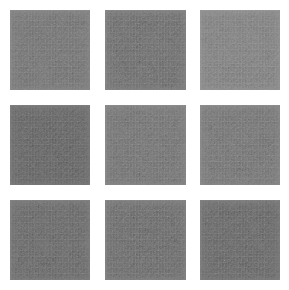

4/4 [==============================] - 1s 168ms/step
Epoch 2/20 | D Loss: 1.1655 | G Loss: 0.1030
1/1 [==============================] - 0s 123ms/step


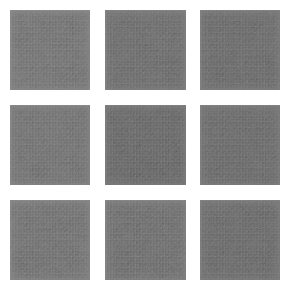

4/4 [==============================] - 1s 172ms/step
Epoch 3/20 | D Loss: 2.6036 | G Loss: 0.0077
1/1 [==============================] - 0s 135ms/step


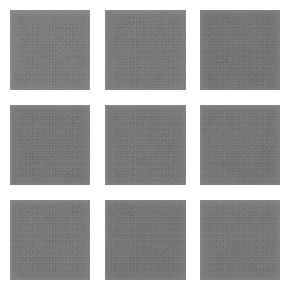

4/4 [==============================] - 1s 164ms/step
Epoch 4/20 | D Loss: 4.3835 | G Loss: 0.0016
1/1 [==============================] - 0s 112ms/step


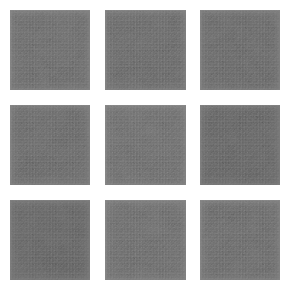

4/4 [==============================] - 1s 155ms/step
Epoch 5/20 | D Loss: 4.1231 | G Loss: 0.0023
1/1 [==============================] - 0s 110ms/step


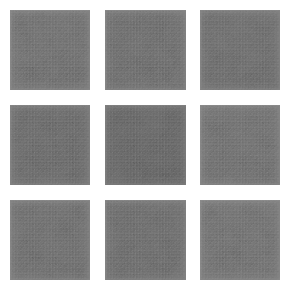

4/4 [==============================] - 1s 157ms/step
Epoch 6/20 | D Loss: 3.1242 | G Loss: 0.0311
1/1 [==============================] - 0s 138ms/step


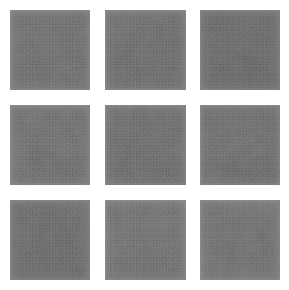

4/4 [==============================] - 1s 218ms/step
Epoch 7/20 | D Loss: 1.6215 | G Loss: 0.2619
1/1 [==============================] - 0s 133ms/step


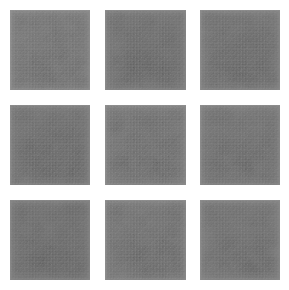

4/4 [==============================] - 1s 179ms/step
Epoch 8/20 | D Loss: 0.7100 | G Loss: 0.6165
1/1 [==============================] - 0s 126ms/step


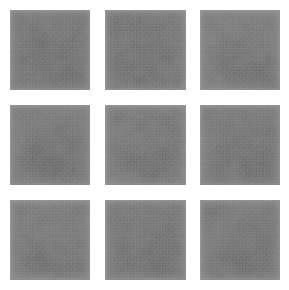

4/4 [==============================] - 1s 171ms/step
Epoch 9/20 | D Loss: 0.4216 | G Loss: 0.6971
1/1 [==============================] - 0s 133ms/step


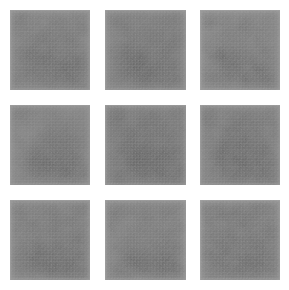

4/4 [==============================] - 1s 181ms/step
Epoch 10/20 | D Loss: 0.3444 | G Loss: 0.6978
1/1 [==============================] - 0s 111ms/step


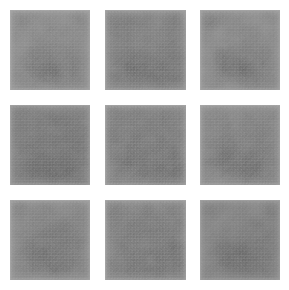

4/4 [==============================] - 1s 145ms/step
Epoch 11/20 | D Loss: 0.3441 | G Loss: 0.6984
1/1 [==============================] - 0s 104ms/step


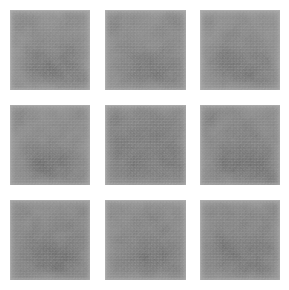

4/4 [==============================] - 1s 154ms/step
Epoch 12/20 | D Loss: 0.3438 | G Loss: 0.6989
1/1 [==============================] - 0s 129ms/step


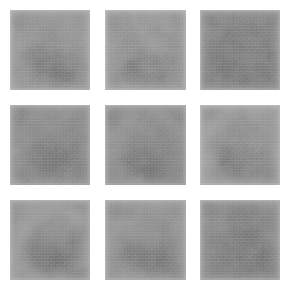

4/4 [==============================] - 1s 153ms/step
Epoch 13/20 | D Loss: 0.7132 | G Loss: 0.6995
1/1 [==============================] - 0s 131ms/step


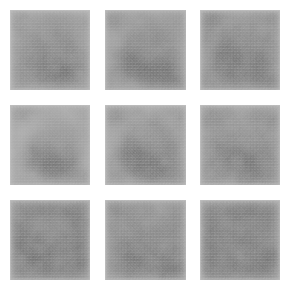

4/4 [==============================] - 1s 179ms/step
Epoch 14/20 | D Loss: 0.3565 | G Loss: 0.7001
1/1 [==============================] - 0s 126ms/step


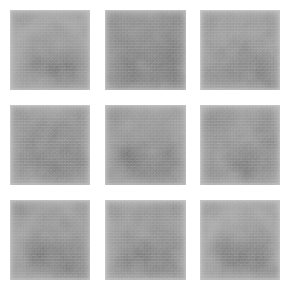

4/4 [==============================] - 1s 181ms/step
Epoch 15/20 | D Loss: 0.3430 | G Loss: 0.7006
1/1 [==============================] - 0s 128ms/step


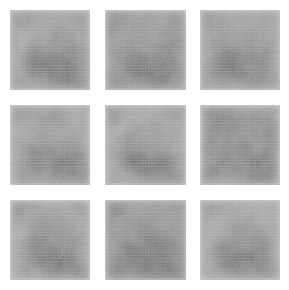

4/4 [==============================] - 1s 175ms/step
Epoch 16/20 | D Loss: 0.3531 | G Loss: 0.7019
1/1 [==============================] - 0s 133ms/step


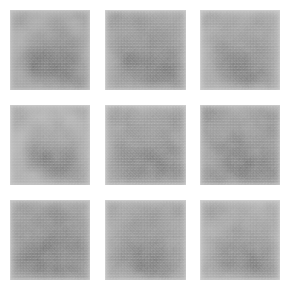

4/4 [==============================] - 1s 159ms/step
Epoch 17/20 | D Loss: 0.3471 | G Loss: 0.7047
1/1 [==============================] - 0s 105ms/step


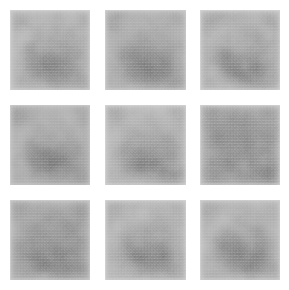

4/4 [==============================] - 1s 144ms/step
Epoch 18/20 | D Loss: 0.3398 | G Loss: 0.7097
1/1 [==============================] - 0s 118ms/step


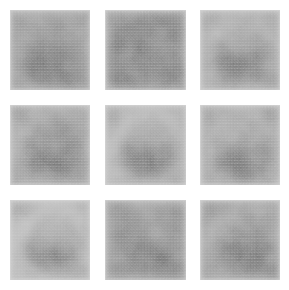

4/4 [==============================] - 1s 145ms/step
Epoch 19/20 | D Loss: 0.3413 | G Loss: 0.7189
1/1 [==============================] - 0s 132ms/step


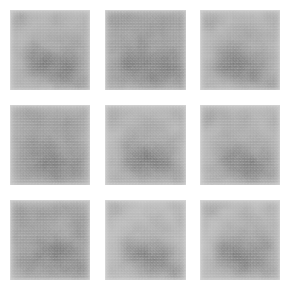

4/4 [==============================] - 1s 174ms/step
Epoch 20/20 | D Loss: 0.3307 | G Loss: 0.7361
1/1 [==============================] - 0s 124ms/step


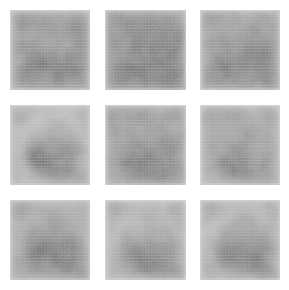

Training complete! Check generated images.


In [38]:
epochs = 20
batch_size = 128

for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss[0]:.4f} | G Loss: {g_loss:.4f}")

    # Save generated samples
    noise = np.random.normal(0, 1, (16, 100))
    gen_imgs = generator.predict(noise)

    plt.figure(figsize=(3,3))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(gen_imgs[i,:,:,0], cmap='gray')
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    plt.close()

print("Training complete! Check generated images.")